# Chapter 1 - Introduction

## Example: Polynomial Curve Fitting

Suppose we observe a real-valued variable $x$ and we wish to use this variable to predict the value of a real_valued target variable $t$.

In this example we will generate data from the function $\sin (2 \pi x)$.

Now let us suppose we are given a training set with $N$ observations of $x$, written as

$$
 \boldsymbol{x} = (x_{1}, \dots, x_{N})
$$,
together with the corresponding observations of $t$, $\boldsymbol{t} = (t_{1}, \dots, t_{N})$

In [13]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
%matplotlib inline

azulito = '#56a5c7'
naranja = '#e69e00'
rojo = '#94001c'

In [2]:
def f(x):
    """ Function that generates the data and that we wish to approximate"""
    return np.sin(2*np.pi*x)


def create_df(f, sample_size, std):
    """ This function generates the training data by adding a random noise to the function f(x) """
    np.random.seed(4)
    x = np.linspace(0, 1, sample_size)
    y = f(x) + np.random.normal(0.0, scale=std, size=len(x))
    return x, y
    

Let us now create the train/test data sets. For the train data sets we will use the function _create_df_ which was create to output y = sin(2 pi x) + random noise. We will train the data in this section with only 10 points.

Fot the test set let's use 100 points 

In [3]:
x_train, y_train = create_df(f, 10, 0.25)

x_test = np.linspace(0,1, 200) #for drawing the generating function and generate the test set
y_test = f(x_test)

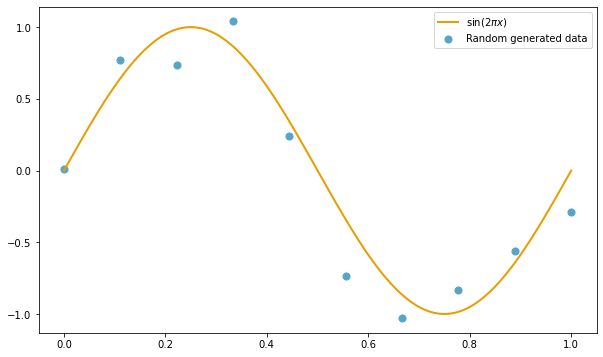

In [4]:
fig, ax= plt.subplots(figsize=(10,6))

ax.scatter(x_train,y_train, color='#56a5c7',s=50, label='Random generated data')

ax.plot(x_test, y_test, color='#e69e00', lw=2, label=r'$\sin(2 \pi x)$')
ax.legend()

Generating data this way we try to mimic a feature of many real data sets: namely, that they posses an underlying regularity, which we wish to learn, but individual observations are _noisy_. This noise might arise from an intrisically stochastic process or, more tipically arise from sources of variability that are themselves unobserved.

Our goal: **exploit this training set in order to make predictions of the value** $\hat{t}$ **for some new value** $\hat{x}$ **of the input variable.**


In this chapter we will make a rather informal discussion of how to approach this problem. Let us consider a simple approach based on curve fitting. We shall fit the data to a polynomial function of the form

$$
y(x, \boldsymbol{\omega}) = \omega_{0} + \omega_{1}x + \omega_{2} x^2 + \dots + \omega_{M} x^{M}
$$.

Note that, although the polynomial function $y(x, \boldsymbol{\omega})$ is a non-linear function of $x$ it is a linear function of the coefficients $\boldsymbol{\omega}$.

This type of models are called _Linear Models_.

The value of the coefficients are obtained by fitting the polynomial to the training data. This can be done by minimizing an _error function_ that measures the distance between the function $y(x, \boldsymbol{\omega})$, for any given value of $\boldsymbol{\omega}$ and the training set data points.

One natural choice of the error function is the sum of the squares of the errors between the predictions $y(x_{n}, \boldsymbol{\omega})$ for each data point $x_{n}$ and the corresponding target values $t_{n}$, that is:

$$
    E(\boldsymbol{\omega}) = \frac{1}{2} \sum_{n=1}^{N} \left[y(x_{n}, \boldsymbol{\omega}) - t_{n}  \right]^{2}
$$

We can solve the curve fitting problem by choosing the value of $\boldsymbol{\omega}$ which minimizes the error function. There remains the problem of choosing the order of the polynomial. Let's now fit the training data with polynomials of different order.

Note: It is sometimes more convenient to use the _root-mean-square error_ defined by

$$
E_{\textrm{RMS}} = \sqrt{2 E(\boldsymbol{\omega}^{*})/N}
$$,
where $\boldsymbol{\omega}^{*}$ is the value that minimizes E.

Let us now then fit the training data to different choices of $M$, the degree of the polynomial. For that we use sklearn's [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) function.

In [5]:
degree = [0, 1, 3, 9]
#model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
#model.fit(x_train.reshape(-1, 1), y_train)
#y_pred = model.predict(x_test.reshape(-1, 1))

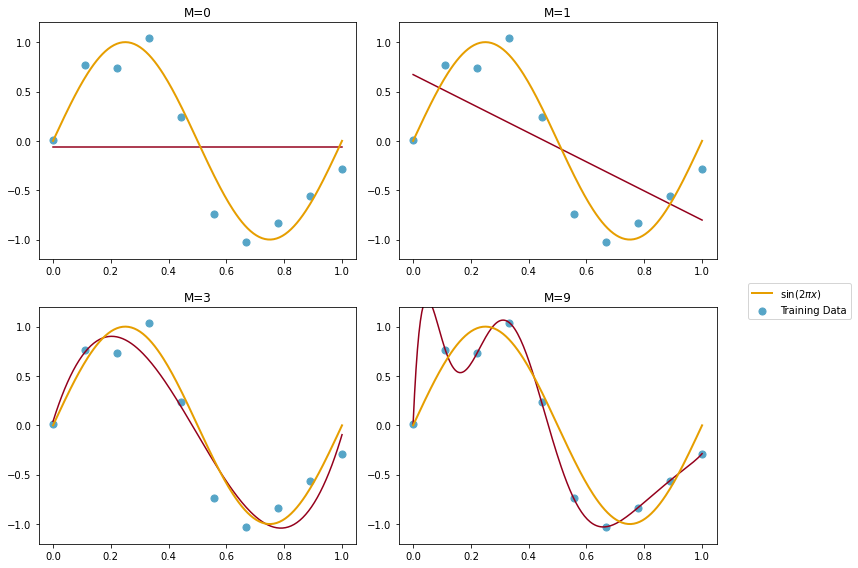

In [6]:
plt.figure(figsize=(12, 8))
for i, d in enumerate(degree):
    #plt.figure(figsize=(4, 4))
    ax = plt.subplot(2, 2, i+1)
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(x_train.reshape(-1,1), y_train)
    y_pred = model.predict(x_test.reshape(-1,1))
    plt.ylim(-1.2,1.2)
    plt.plot(x_test, y_pred, color='#94001c')
    plt.title('M={}'.format(d))
    plt.scatter(x_train,y_train, color='#56a5c7',s=50, label='Training Data')
    plt.plot(x_test, y_test, color='#e69e00', lw=2, label=r'$\sin (2 \pi x)$')
    #plt.legend()
    


    
plt.legend(bbox_to_anchor=(1.1, 1.1), loc=2, borderaxespad=0.)    
#plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
#handles, labels = ax.get_legend_handles_labels()    
#fig.legend(handles, labels, loc='upper center')
#plt.legend()    
#handles, labels = ax.get_legend_handles_labels()    
#fig.legend(handles, labels, loc='upper center')    
plt.tight_layout()
#ax[0,0].plot(x_test, y_pred, color='#94001c')
#ax[0,0].scatter(x_train,y_train, color='#56a5c7',s=50, label='Random generated data')
#ax[0,0].plot(x_test, y_test, color='#e69e00', lw=2, label=r'$\sin(2 \pi x)$')

In [7]:
training_errors = []
test_errors = []
m = np.arange(0,10)
for d in m:
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(x_train.reshape(-1,1), y_train)
    y_pred_test = model.predict(x_test.reshape(-1,1))
    y_pred_train = model.predict(x_train.reshape(-1,1))
    err = np.sqrt(mean_squared_error(y_pred_train, y_train))
    err_test = np.sqrt(mean_squared_error(y_pred_test, f(x_test) + np.random.normal(scale=0.25, size=len(y_pred_test))))
    training_errors.append(err)
    test_errors.append(err_test)
 

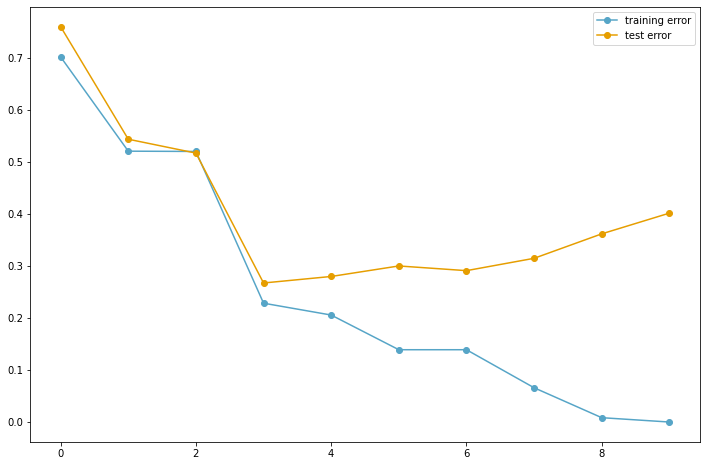

In [11]:
plt.figure(figsize=(12,8))
plt.plot(m, training_errors,'o-', label='training error', color=azulito)
#plt.scatter(m, training_errors)
plt.plot(m, test_errors,'o-', label='test error', color=naranja)
#plt.scatter(m, test_errors)
plt.legend()

It is also interesting the behaviour of a given model as the size of the dataset changes. We see in the next pictures that, for a given model complexity ($M=9$ in this case), the overfitting problem is less severe for larger datasets. In other words, the larger the data set, the more complex the model we can afford to fit to the data.

This poses a rather uncomfortable feature: we have to limit the number of parameters of our model depending on the size of the data set and not depending on the complexity of the problem itself. We will see later that by adopting a _Bayesian_ approach this problem can be avoided.

In [9]:
x15_train, y15_train = create_df(f, 15, 0.25)
x100_train, y100_train = create_df(f, 100, 0.25)
x_example_test = np.linspace(0,1,200)
model15 = make_pipeline(PolynomialFeatures(9), LinearRegression())
model15.fit(x15_train.reshape(-1,1), y15_train)
y15_pred = model15.predict(x_example_test.reshape(-1,1))

model100 = make_pipeline(PolynomialFeatures(9), LinearRegression())
model100.fit(x100_train.reshape(-1,1), y100_train)
y100_pred = model100.predict(x_example_test.reshape(-1,1))

(-1.65, 1.65)

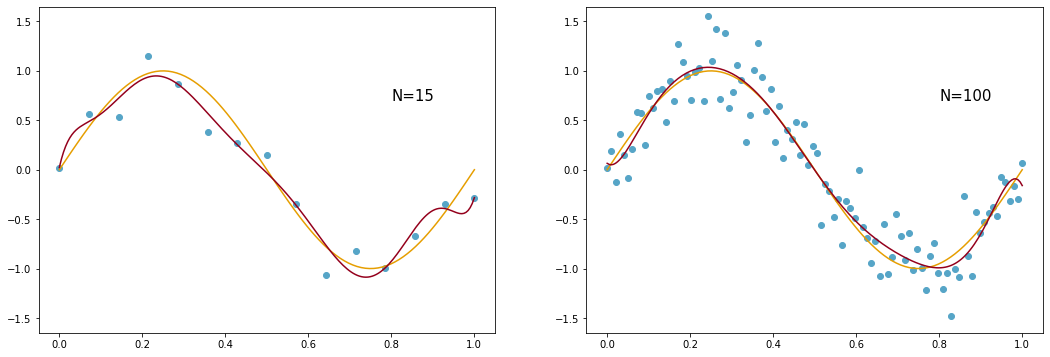

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

ax[0].scatter(x15_train, y15_train, color=azulito)
ax[0].plot(x100_train, f(x100_train), color=naranja)
ax[0].plot(x_example_test, y15_pred, color=rojo)
ax[0].text(0.8,0.7,r'N=15',fontsize=15)
ax[0].set_ylim(-1.65,1.65)

ax[1].scatter(x100_train, y100_train, color=azulito)
ax[1].plot(x100_train, f(x100_train), color=naranja)
ax[1].plot(x_example_test, y100_pred, color=rojo)
ax[1].text(0.8,0.7,r'N=100',fontsize=15)
ax[1].set_ylim(-1.65,1.65)


For the moment, though, we will continue with this approach and we'll explore other techniques if we want to use relatively complex and flexible models in datasets of limited size.

One technique is to add a penalty term to the error function in order to prevent that the coefficients $\boldsymbol{\omega}$ reach large values. The simple of such penalty terms is the norm of the coefficient vector:

$$
    \tilde{E}(\boldsymbol{\omega}) = \frac{1}{2} \sum_{n=1}^{N} \left[y(x_{n}, \boldsymbol{\omega}) - t_{n}  \right]^{2} + \frac{\lambda}{2} ||\boldsymbol{\omega}||^2
$$

Now let us plot the results of fitting a pomynomial of order 9 ($M = 9$) to the same data set ($N=10$) but now using the regularized error function for different values of $\lambda$.

Note: In sklearn the regularization parameter is $\alpha = \frac{\lambda}{2}$


In [31]:
regmodel = make_pipeline(PolynomialFeatures(9), Ridge(alpha=2*np.exp(-0)))

In [32]:
regmodel.fit(x_train.reshape(-1,1), y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=9)),
                ('ridge', Ridge(alpha=2.0))])

In [33]:
y_reg_pred = regmodel.predict(x_test.reshape(-1,1))

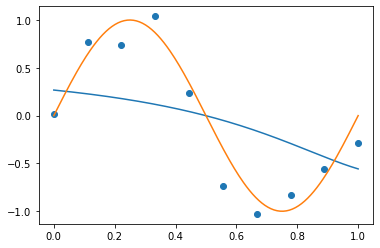

In [37]:
fig, ax = plt.subplots()

ax.scatter(x_train, y_train)
ax.plot(x_test, y_reg_pred)
ax.plot(x_test, f(x_test))

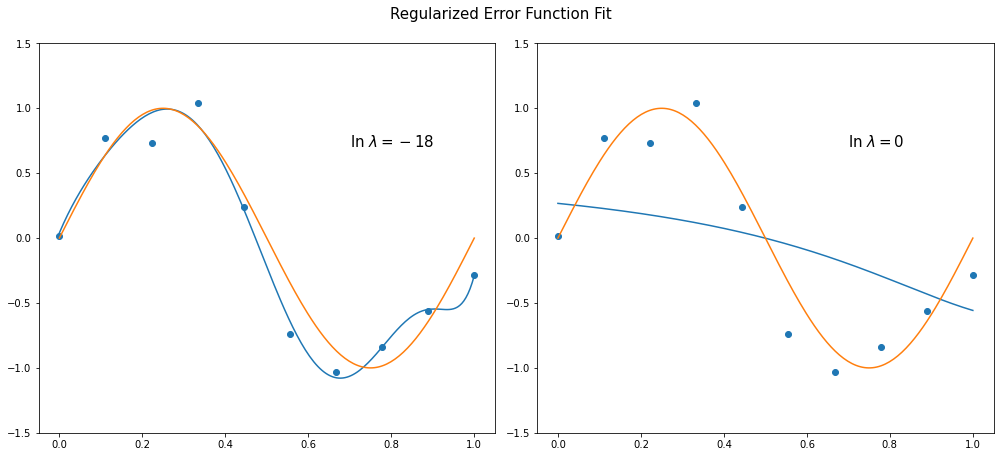

In [68]:
plt.figure(figsize=(14,6))

for i, lamd in enumerate([-18,0]):
    regmodel = make_pipeline(PolynomialFeatures(9), Ridge(alpha=2*np.exp(lamd)))
    regmodel.fit(x_train.reshape(-1,1), y_train)
    yred_pred = regmodel.predict(x_test.reshape(-1,1))
    plt.subplot(1,2,i+1)
    plt.ylim(-1.5,1.5)
    plt.scatter(x_train, y_train)
    plt.plot(x_test, yred_pred)
    plt.plot(x_test, f(x_test))
    plt.text(0.7,0.7,fr'$\ln \ \lambda = {lamd}$', fontsize=15)

plt.suptitle('Regularized Error Function Fit', fontsize=15, y=1.05)    
plt.tight_layout()